**Setup Environment and Install Necessary Packages**

In [5]:
import sys
sys.path.append('/usr/local/lib/python3.8.10/site-packages/')

In [10]:
!rm -r opentf
!git clone -b uspt https://github.com/fani-lab/opentf

Cloning into 'opentf'...
remote: Enumerating objects: 6391, done.
remote: Counting objects: 100% (1388/1388), done.
remote: Compressing objects: 100% (1025/1025), done.
remote: Total 6391 (delta 436), reused 1200 (delta 356), pack-reused 5003
Receiving objects: 100% (6391/6391), 109.24 MiB | 16.15 MiB/s, done.
Resolving deltas: 100% (2547/2547), done.
Updating files: 100% (567/567), done.


In [11]:
!sudo apt-get update -y
!sudo apt-get install python3.8.10
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 2
!python --version
!sudo apt-get install python3-pip
!python -m pip install --upgrade pip
!pip install ipykernel

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package python3.8.10
E: Couldn't find any package by glob 'python3.8.10'
E: Couldn'

In [14]:
%cd opentf/
!pip install -r requirements.txt
%cd src/

/content/opentf
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 34.3 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.11.0 Requires-Python <3.13,>=3.9; 1.11.0rc1 Requires-Python <3.13,>=3.9; 1.11.0rc2 Requires-Python <3.13,>=3.9
ERROR: Could not find a version that satisfies the requirement contextlib (from versions: none)
ERROR: No matching distribution found for contextlib
/content/opentf/src


In [17]:
import os
# !git clone https://github.com/stellargraph/stellargraph.git
os.chdir('../../stellargraph')
!pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/stellargraph
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.23.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Created wheel for stellargraph: filename=stellargraph-1.3.0b0-py3-none-any.whl size=431858 sha256=789b59002e5c2281747da3a259d7bed0e83ac600e89813af90594c6ab0165ce5
  Stored in directory: /tmp/pip-ephem-wheel-cache-g_qdbin4/wheels/92/96/4f/afd92bd576216d79ba4481fa45e7820fe6ca2de4776ccbf9e7
Successfully built stellargraph
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: stellargraph
    Found existing installation: stellargraph 1.3.0b0
    Uninstalling stellargraph-1.3.0b0:
      Successfully uninstalled stellargraph-1.3.0b0


In [18]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install torch-scatter torch-sparse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
os.chdir('../opentf/src')

**Param.py File which contains neccessary hyperparameters settings**

In [22]:
!cat param.py

import random
import torch
import numpy as np

random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

np.random.seed(0)

settings = {
    'model':{
        'baseline': {
            'random': {
                'b': 4096
            },
            'fnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': None,  # number of negative samples
                'ns': None,  # 'uniform', 'unigram', 'unigram_b'
            },
            'bnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': None,  # number of negative samples
                'ns': None,  # 'uniform', 'unigram', 'unigram_b'
                's': 1  # # sample_elbo for bnn
            },
           

In [23]:
%%writefile param.py
import random
import torch
import numpy as np

random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

np.random.seed(0)

settings = {
    'model':{
        'baseline': {
            'random': {
                'b': 128
            },
            'fnn':{
                'l': [128],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4,  # batch size
                'e': 20,  # epoch
                'nns': 3,  # number of negative samples
                'ns': 'unigram_b',  # 'uniform', 'unigram', 'unigram_b'
            },
            'bnn':{
                'l': [128],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4,  # batch size
                'e': 20,  # epoch
                'nns': 3,  # number of negative samples
                'ns': 'uniform',  # 'uniform', 'unigram', 'unigram_b'
                's': 1  # # sample_elbo for bnn
            },
            'nmt': {
                'base_config': './mdl/nmt_config.yaml'
            },
            'emb':{
                'd': 100,# embedding dimension
                'e': 10,# epoch
                'dm': 1,# training algorithm. 1: distributed memory (PV-DM), 0: distributed bag of words (PV-DBOW)
                'w': 1 #cooccurrence window
            }
        },
        'cmd': ['train', 'test', 'eval', 'plot'],  # 'train', 'test', 'eval', 'plot', 'agg'
        'nfolds': 5,
        'train_test_split': 0.85,
        'step_ahead': 1,#for now, it means that whatever are in the last [step_ahead] time interval will be the test set!
    },
    'data':{
        'domain': {
            'dblp':{},
            'uspt':{},
            'imdb':{},
        },
        'location_type': 'country', #should be one of 'city', 'state', 'country' and represents the location of members in teams (not the location of teams)
        'filter': {
            'min_nteam': 75,
            'min_team_size': 3,
        },
        'parallel': 1,
        'ncore': 0,# <= 0 for all
        'bucket_size': 500
    },
}

Overwriting param.py


**Run Command which is required to run different models illustrated on uspt dataset**
For Example: python main.py -data ../data/raw/uspt/toy.patent.tsv -domain uspt -model bnn_emb_gnn bnn_emb_gnn_loc bnn_emb_loc_meta bnn_emb_meta -filter 0

In [26]:
!python main.py -data ../data/raw/uspt/toy.patent.tsv -domain uspt -model bnn_emb_gnn -filter 0

Streaming output truncated to the last 5000 lines.
Epoch: 0056	train_loss = 0.58225	val_roc = 0.96697	val_ap = 0.99257	val_f1 = 0.89157	val_acc = 0.80435
/usr/local/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)
NeighborSampler(sizes=[-1])
>>>>>>Train: (ROC)  0.9396880101578087  (AP)  0.9834537431661519  (ACC)  0.8010752688172043  (F1)  0.8895522388059701
Epoch: 0057	train_loss = 0.58240	val_roc = 0.87688	val_ap = 0.96340	val_f1 = 0.89157	val_acc = 0.80435
/usr/local/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)
NeighborSampler(sizes=[-1])
>>>>>>Train: (ROC)  0.944789588245964  (AP)  0.9857490180071997  (ACC)  0.8064516129032258  (F1)  0.8922155688622755
Epoch: 0058	train_loss = 0.57798	val_roc = 0.97898	val_ap = 0.99570	val_f1 = 0.90244	v

**This is how the results curve would look like**

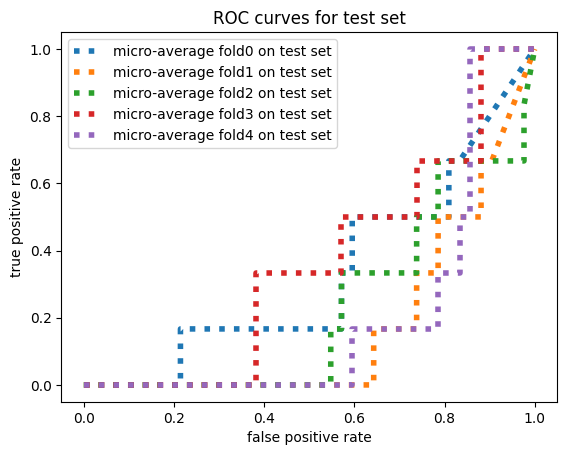

In [27]:
from IPython.display import Image
Image('/content/opentf/output/toy.patent.tsv/bnn_emb_gnn/t8.s128.m24.l[128].lr0.1.b4.e20.nns3.nsuniform.s1/test.roc.png')

**Extracted Metrics**

In [28]:
import pandas as pd
pd.read_csv('/content/opentf/output/toy.patent.tsv/bnn_emb_gnn/t8.s128.m24.l[128].lr0.1.b4.e20.nns3.nsuniform.s1/test.pred.eval.mean.csv')

,Unnamed: 0,mean
0,P_2,0.050000
1,P_5,0.020000
2,P_10,0.030000
3,recall_2,0.020000
4,recall_5,0.020000
5,recall_10,0.060000
6,ndcg_cut_2,0.061315
7,ndcg_cut_5,0.033916
8,ndcg_cut_10,0.053930
9,map_cut_2,0.020000
